In [1]:
from IPython.display import Image, display
import os
import PIL
from PIL import Image
from IPython.display import clear_output
import json
import ntpath


In [14]:
image_labels = {}

In [29]:
rate = "eyes_open"

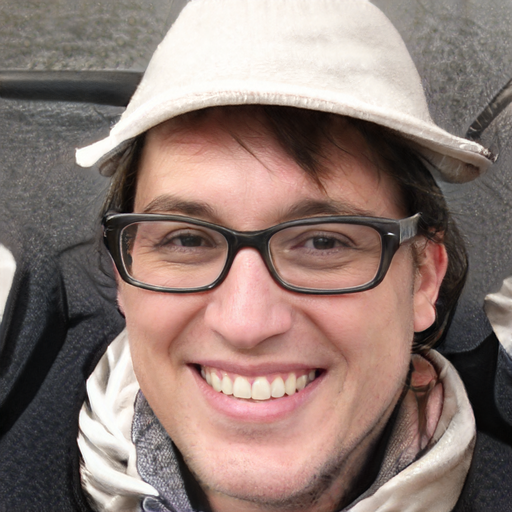

Number 211
1:  Closed, 2: Middle, 3: Open


KeyboardInterrupt: 

In [30]:
path = "/Users/leon/Google Drive/Data/Generated/Images/"
valid_images = (".jpg",".png")
k = 0
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((512,512), PIL.Image.LANCZOS))
        
        name = ntpath.basename(f).split('.')[0]
        try:
            x = image_labels[name]
        except KeyError:
            image_labels[name] = {}
            
        try:
            x = image_labels[name][rate]
        except KeyError:
            image_labels[name][rate] = {}
        
        print("Number " + str(k))
        k = k+1
        print("1:  Closed, 2: Middle, 3: Open")
        rating =  str(input())
        
        
        image_labels[name][rate] = rating
        print(rating)
        
        clear_output(wait=True)

In [31]:
print(image_labels)

{'img_842': {'age': '3', 'direction': '2', 'glasses': '1', 'smile': '2', 'eyes_open': '2'}, 'img_856': {'age': '3', 'direction': '2', 'glasses': '2', 'smile': '1', 'eyes_open': '2'}, 'img_881': {'age': '3', 'direction': '1', 'glasses': '1', 'smile': '1', 'eyes_open': '2'}, 'img_659': {'age': '1', 'direction': '2', 'glasses': '1', 'smile': '1', 'eyes_open': '3'}, 'img_895': {'age': '3', 'direction': '3', 'glasses': '1', 'smile': '1', 'eyes_open': '2'}, 'img_665': {'age': '1', 'direction': '3', 'glasses': '1', 'smile': '1', 'eyes_open': '2'}, 'img_103': {'age': '1', 'direction': '2', 'glasses': '1', 'smile': '1', 'eyes_open': '3'}, 'img_117': {'age': '2', 'direction': '2', 'glasses': '1', 'smile': '2', 'eyes_open': '3'}, 'img_671': {'age': '2', 'direction': '2', 'glasses': '1', 'smile': '1', 'eyes_open': '2'}, 'img_498': {'age': '2', 'direction': '2', 'glasses': '1', 'smile': '1', 'eyes_open': '2'}, 'img_10': {'age': '2', 'direction': '1', 'glasses': '1', 'smile': '2', 'eyes_open': '3'},

In [32]:
import json

with open('data.json', 'w') as fp:
    json.dump(image_labels, fp)

In [87]:
import numpy as np

eyes = [[],[],[]]

for key in image_labels:
    try:
        x = image_labels[key]['smile']
        eyes[int(x)-1].append(np.load("/Users/leon/Google Drive/Data/Generated/Vectors/" + key + ".npy"))
    except KeyError:
        print("")
    except FileNotFoundError:
        print("")
    except TypeError:
        print("")
    except ValueError:
        print("")


In [88]:
glasses0 = np.mean(eyes[0], axis=0)
glasses1 = np.mean(eyes[1], axis=0)
glasses2 = np.mean(eyes[2], axis=0)

In [89]:
print(eye0.shape)

(1, 512)


In [90]:
np.save("/Users/leon/Google Drive/Data/Generated/smile_0.npy", glasses0)
np.save("/Users/leon/Google Drive/Data/Generated/smile_1.npy", glasses1)
np.save("/Users/leon/Google Drive/Data/Generated/smile_2.npy", glasses2)
#np.save("/Users/leon/Google Drive/Data/Generated/age_3.npy", glasses3)

#np.save("/Users/leon/Google Drive/Data/Generated/eyes_2.npy", eye2)